#  Resume Scoring 

to identify the most suitable candidates

In [11]:
pip install docx2txt

Note: you may need to restart the kernel to use updated packages.


#### Required libraries

In [9]:
import docx2txt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Gathering

#### import job description for Data Scientist role in Elm company

In [10]:
# store the job desccription into a variable 
job_des = docx2txt.process("job_description.docx")

# print the job desccription
print(job_des)

The position holder is responsible for modeling complex business problems, through the use of advanced analytic skills. Also proficient at integrating and preparing large, varied datasets, architecting specialized database and computing environments, and communicating results. Other responsibilities include providing data that is congruent and reliable. The position holder will need to validate their findings using an experimental and iterative approach. Data should be turn into critical information and knowledge that can be used to make sound organizational decisions, According to the policies and procedures followed within ELM.



Analysis and Recognition:



Works with and alongside business analysts by suggesting other products of interest to the client. 

Models and frames business scenarios that are meaningful and which impact on critical business processes and/or decisions. 

 Works in iterative processes with the client and validates findings 

Validates analysis using scenario

#### Import 15 randomly resumes were gathered from resume genius website

In [11]:
# Store the resume in in a variable

mypath='resumes' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

profiles = {}

i = 0 
while i < len(onlyfiles): 
    file = onlyfiles[i]
    if (file != 'resumes/.DS_Store'):
        print (file)
        base = os.path.basename(file)  # return file name with extension
        filename = os.path.splitext(base)[0] # remove extension
        
        content = docx2txt.process(file)

        profiles[filename] = content
    i +=1
    

resumes/Sara Alghamdi.docx
resumes/JOHN SMITH.docx
resumes/Ghada Abduallah.docx
resumes/Arwa Hamid.docx
resumes/Naif Hamid.docx
resumes/Ghada Abdellatif   .docx
resumes/Noura Abdullah.docx
resumes/Malik Rabb.docx
resumes/Abdulrahman.docx
resumes/Fatima Abdulrahman.docx
resumes/Abear Naser.docx
resumes/Khalid Al-Harbi.docx
resumes/Faisal Abdulrahman.docx
resumes/Tahani Abdulrahman.docx
resumes/Ashwaq Khaled.docx


### Calculate cosine_similarity

Cosine similarity is the simplest way to build a vector from text by count the words.

It’s simply measures the angle between the two vectors and returns a real value between -1 and 1.

In [15]:
df = pd.DataFrame()

In [16]:
for key, value in profiles.items():
    #print(key, ' : ', value)
    
    text = [value, job_des]
    
    cv = CountVectorizer()
    count_martix = cv.fit_transform(text)
    # score cosine_similarity(count_martix)
    
    matchPercentage = cosine_similarity(count_martix)[0][1]*100
    matchPercentage = round(matchPercentage, 2) # round to two decimal places
    
    new_row = {'name':key, 'resume_content': value , 'score': matchPercentage }
    #append row to the dataframe
    df = df.append(new_row, ignore_index=True)

In [17]:
df

,name,resume_content,score
0,Sara Alghamdi,Sara Alghamdi\n\n RESUME SAMPLE\n\nSara Algham...,52.19
1,JOHN SMITH,"JOHN SMITH\n\n123 Your Address \n\n City, Sta...",50.55
2,Ghada Abduallah,Ghada Abduallah\n\nGhada Abduallah\n\n\t\n\nPr...,48.86
3,Arwa Hamid,Email: fatima.arain@gmail.com\n\nPhone: (342) ...,43.83
4,Naif Hamid,RESUME OBJECTIVE\n\nRESUME OBJECTIVE\n\nNaif H...,57.42
5,Ghada Abdellatif,Ghada Abdel Latif \n\nAddress Line 1 Address...,52.53
6,Noura Abdullah,SECURITY OPERATIONS SECURITY ANALYST / Securit...,42.98
7,Malik Rabb,"Malik Rabb\n\nSeattle, WA • (123) 456-7891\nmr...",56.22
8,Abdulrahman,Abdulrahman\n\nAbdulrahman\n\n\t\n\nFINANCIAL ...,57.22
9,Fatima Abdulrahman,"FRONT-END DEVELOPER\n\nur Address City, Sta...",46.84


### Visualization 

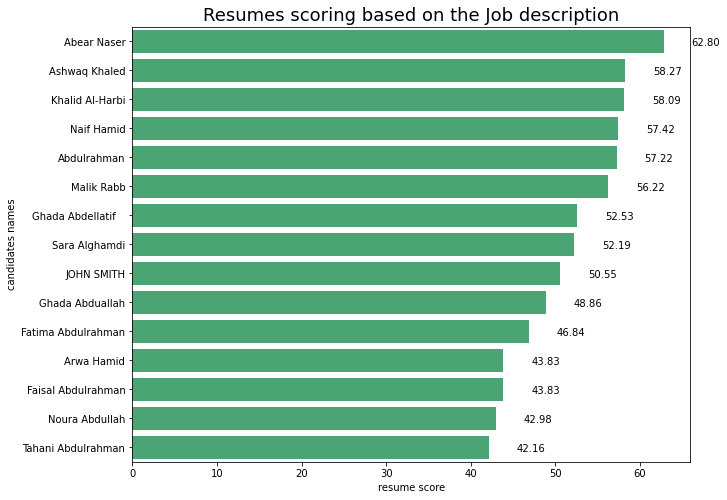

In [18]:
plt.figure(figsize=(10, 8))

# Create barplot
ax = sns.barplot(x = 'score', y='name', 
                 data = df, color = 'mediumseagreen',
                 order=df.sort_values('score', ascending = False).name )

# Annotate every single Bar with its value, based on it's width           
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
    
plt.title('Resumes scoring based on the Job description').set_fontsize('18')
plt.ylabel('candidates names')
plt.xlabel('resume score')

plt.savefig('Resumes_scores.png')


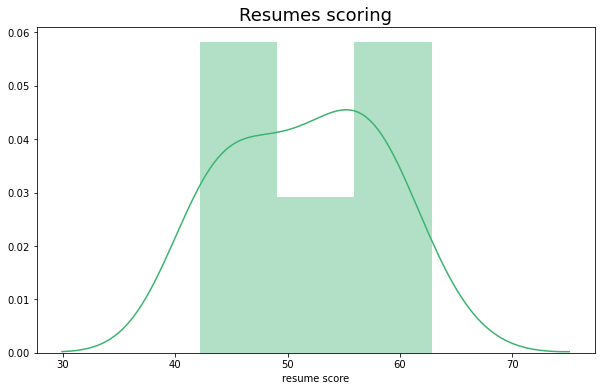

In [19]:
plt.figure(figsize=(10,6))


# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.score, color = 'mediumseagreen')

plt.title('Resumes scoring').set_fontsize('18')
plt.xlabel('resume score')

plt.savefig('score_distribution.png')


### Limitation

- The algorithm just accepts document files, so need more enhancement to accept both pdf and docx format files.

- Need to clean data both job descraption and resumes content from inuseful words like the and linked words.